# **Part 0: Project Introduction**

#### **Introduction to Fintech, Insurtech and Big Data Analysis's role in those industries**

As more companies are moving towards big data and advanced analytics, industries are increasingly leveraging data-driven approaches to enhance decision-making processes and optimize operations. This project focuses on applying predictive maintenance techniques to the automative insurance industry, specifically targeting the optimization of insurance pricing strategies.

Usage-based insurance, employing telematics devices or black boxes, track not only basic driving metrics but also factors like speed, rapid acceleration, cornering, and hard braking, providing a comprehensive overview of driving performance. Safe driving habits may yield discounts on premiums. This type of insurance offers various advantages. Responsible driving is rewarded with discounts on future premiums, encouraging safer behavior behind the wheel. For new drivers with high premiums, particularly those facing costly premiums, usage-based insurance could offer a more affordable option.

The primary objective of this project is to develop a predictive modeling framework for automotive insurtech premiums, leveraging a diverse set of features that serve as proxies for safe or dangerous driving behaviors. By harnessing customer data from telematics devices, vehicle sensors, and other sources using PySpark, the project aims to predict the future insurance premiums of policyholders based on their driving patterns, behaviors, and risk factors. The key purposes of this project include: <br> <br>

- Premium Prediction: Develop machine learning models that predict the future insurance premiums of policyholders based on their risk profiles and driving behaviors, enabling insurers to offer personalized and dynamic pricing.

- Behavioral Incentives: Encourage safer driving behaviors among policyholders by linking insurance premiums to driving performance metrics and providing incentives for adherence to safe driving practices.

- Competitive Advantage: Enhance insurers' competitiveness by offering more accurate, transparent, and customer-centric insurance products that reflect individual risk profiles and driving habits.

- Risk Mitigation: Mitigate insurance fraud, reduce claim losses, and improve underwriting profitability by leveraging predictive analytics to identify high-risk drivers and proactively intervene to prevent accidents or losses.

#### **Model Introduction**

Our project aims to recreate the Insurance annual price calculations part of Insurance companies. We try to use data-driven analytics and predictions to determine whether a customer is going to get a price discount or a penalty, based on their driving data. We will be working exclusively on Automotive Insurance.
<br> <br>
The Driving data is collected by using Telematics, devices that are required to be installed on customers' car, which can monitor distance, accelaration, braking, etc.. and Used to train, as well as Make predictions.
<br> <br>
Our model will also Store the Output data, and use that database to give customers their payment information with the User Interface. Currently a line of Code for demonstration purpose, but in reality can be a smartphone app or a website.
<br> <br>
We also try to use Hashing algorithms to store and compare our "Customer's Data" to replicate a log in system.

We also replicate Enterprise-level databases by Not only running PySpark at a Local Level, but also try to connect the SparkSesions to a Google Cloud Service's Bucket, through PySpark's Google API <br> <br>
Heres a diagram of our Model, Included in a PDF file with the folder

#### **Dataset Introduction**

***Our Dataset was collected and Engineered Based on Consulting to Experts in the field of Insurance, as well as Professors who specialize in the field of Fintech as well.*** <br> <br>
Though acutally finding a publicly avaiable Dataset in this field, especially with Highly confidential information like telematics is Difficult. However, it is entriely possible and not so difficult to acquire this data either through the use of telematics devices if we are working in the role of a Data scientist in an actual Insurance company.

***There are a total of 1000 observations splitted into 800 training observations and 200 testing observations, The data has a total of 11 features, as well as 4 Personally Indentifiable Information (ID, D.O.B, password Hash, Payment Date, which will not be used for model training)***

***Explaination of The Features:***


```


1.   vio_1:                No. of traffic violations class I
2.   vio_2:	            No. of traffic violations class II
3.   vio_3:	            No. of traffic violations class III
4.   km:	               Km driven at low gas level
5.   change_acc:	       No. of Sudden Accelaration changes
6.   avg_speed:	        Avg Speed
7.   collision:	        No. of car collision caused by owner
8.   collided:	         No. of times car collided by third party
9.   max_acc:	          Maxium Acceleration
10.  avg_acc:	          Avg acceleration
11.  total_distance:	   Total driving distance
12.  csh_dis	           Discount for annual rate





#**Part 1: Data Extraction from Cloud, Descriptive Statistics, Visualizations, Data Processing, ML Training and Prediction, Model and Data Saving**

### **Import File/ Install PySpark**

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 872.9 kB/s eta 0:00:0000:0100:07
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 521.3 kB/s eta 0:00:00a 0:00:01
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488496 sha256=d987a0282f994b4288b3d4a6835419ee8beb36e94b6f18c71304bc66448e36f4
  Stored in directory: /Users/khanhdao/Library/Caches/pip/wheels/95/13/41/f7f135ee114175605fb4f0a89e7389f3742aa6c1e1a5bcb657
Successfully built pyspark


### **If runtime is running, you can run from this cell** / Creating Spark Session



In [ ]:
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import split

spark = SparkSession.builder.appName('pyspark').getOrCreate()


24/05/21 20:25:33 WARN Utils: Your hostname, Khanhs-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.206.2.131 instead (on interface en0)
24/05/21 20:25:33 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/21 20:25:34 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### **Working with missing data**

In [ ]:
#Importiting
# Import the train dataset
file_name = "Insurance_train.csv"
file_path = f"Data2/{file_name}"

dfm = spark.read.csv(file_path, header=True, inferSchema=True)
dfm.show(5)
#Importing the test dataset
bucket_name1 = "fnp-cluster-bucker"
file_name1 = "Insurance_test.csv"
file_path1 = f"Data2/{file_name1}"
df1m = spark.read.csv(file_path1, header=True, inferSchema=True)
df1m.show(5)

+--------------+---------+-----+-----+-----+------+----------+---------+---------+--------+-------+-------+--------------+----------+------------+--------+-----------+----------+--------------------+
|          name|       id|vio_1|vio_2|vio_3|    km|change_acc|avg_speed|collision|collided|max_acc|avg_acc|total_distance|annual_pay|     csh_dis|   final|payment_due|birth_date|               phash|
+--------------+---------+-----+-----+-----+------+----------+---------+---------+--------+-------+-------+--------------+----------+------------+--------+-----------+----------+--------------------+
|   Le Van Hoai|BFT662532|    4|    1|    0| 30.96|       576|    75.96|        1|       1|   0.49|   0.25|          7382|  87000000|-3109930.694|84060557|    17/3/25|    2/6/87|8c96008e5b4756d99...|
|Hoang Thi Hien|BFT828396|    4|    1|    1|137.47|       573|   100.98|        1|       1|   0.49|   0.25|         11263|  87000000| 905254.9858|87910239|    16/6/24|    7/8/90|5bae15eb0eb0d11d8...|


In [ ]:
#Step 1
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame for easier manipulation
pandas_dfm = dfm.toPandas()
pandas_df1m = df1m.toPandas()

In [ ]:
#Step 2
# Continuous variables
continuous_vars = ['km', 'avg_speed', 'max_acc', 'avg_acc', 'total_distance']
pandas_df_continuous = pandas_dfm[continuous_vars]

# Interpolation
pandas_df_continuous_interpolated = pandas_df_continuous.interpolate(method='linear', limit_direction='forward', axis=0)

# Discrete variables
discrete_vars = ['vio_1', 'vio_2', 'vio_3', 'change_acc', 'collision', 'collided']
pandas_df_discrete = pandas_dfm[discrete_vars]

# Fill missing values with the mode (most frequent value)
pandas_df_discrete_imputed = pandas_df_discrete.apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
#Step 3
# Update the original Pandas DataFrame with interpolated and imputed data
pandas_dfm.update(pandas_df_continuous_interpolated)
pandas_dfm.update(pandas_df_discrete_imputed)

# Convert back to Spark DataFrame
dfm_interpolated = spark.createDataFrame(pandas_dfm)

In [ ]:
#Step 4
# Interpolation and imputation for test dataset
pandas_df1_continuous = pandas_df1m[continuous_vars]
pandas_df1_continuous_interpolated = pandas_df1_continuous.interpolate(method='linear', limit_direction='forward', axis=0)

pandas_df1_discrete = pandas_df1m[discrete_vars]
pandas_df1_discrete_imputed = pandas_df1_discrete.apply(lambda x: x.fillna(x.mode()[0]))

pandas_df1m.update(pandas_df1_continuous_interpolated)
pandas_df1m.update(pandas_df1_discrete_imputed)

df1m_interpolated = spark.createDataFrame(pandas_df1m)
dfm_interpolated.show(20)
df1m_interpolated.show(20)

+----------------+---------+-----+-----+-----+------------------+----------+---------+---------+--------+-------+-------+--------------+----------+------------+---------+-----------+----------+--------------------+
|            name|       id|vio_1|vio_2|vio_3|                km|change_acc|avg_speed|collision|collided|max_acc|avg_acc|total_distance|annual_pay|     csh_dis|    final|payment_due|birth_date|               phash|
+----------------+---------+-----+-----+-----+------------------+----------+---------+---------+--------+-------+-------+--------------+----------+------------+---------+-----------+----------+--------------------+
|     Le Van Hoai|BFT662532|  4.0|  1.0|  0.0|             30.96|     576.0|    75.96|      1.0|     1.0|   0.49|   0.25|        7382.0|  87000000|-3109930.694| 84060557|    17/3/25|    2/6/87|8c96008e5b4756d99...|
|  Hoang Thi Hien|BFT828396|  4.0|  1.0|  1.0|            137.47|     573.0|   100.98|      1.0|     1.0|   0.49|   0.25|       11263.0|  87

### ***If this two codes fail, run each of then again individually (This code is use to save the interpolated data to the GCP's server, but that aleady's been done so it is not necessary to run it again)***

In [ ]:
#Saving the Interpolated Data
dfm_interpolated.write.csv("Insurance_train.csv", header=True, mode="overwrite")

In [ ]:
df1m_interpolated.write.csv("Insurance_test.csv", header=True, mode="overwrite")

Có thể chạy lại nếu thấy lỗi

### Working with complete data

In [ ]:
# Import the train dataset
file_name = "Insurance_train.csv"
df = spark.read.csv(file_name, header=True, inferSchema=True)
df.show(20)

+---------------+---------+-----+-----+-----+------+----------+---------+---------+--------+-------+-------+--------------+----------+------------+---------+-----------+----------+--------------------+
|           name|       id|vio_1|vio_2|vio_3|    km|change_acc|avg_speed|collision|collided|max_acc|avg_acc|total_distance|annual_pay|     csh_dis|    final|payment_due|birth_date|               phash|
+---------------+---------+-----+-----+-----+------+----------+---------+---------+--------+-------+-------+--------------+----------+------------+---------+-----------+----------+--------------------+
| Tran Thi Nhung|BFT239940|  5.0|  2.0|  1.0|  35.0|     422.0|    76.44|      0.0|     1.0|    0.4|   0.18|       10161.0| 250000000|  -6468250.0|243531750|    14/3/25|  14/11/87|61b5374d31a5008b5...|
|     Vu Thi Lan|BFT857180|  1.0|  2.0|  0.0|100.99|     596.0|     61.9|      1.0|     1.0|    0.5|   0.26|        4612.0|  80000000|-3281502.791| 76691800|    18/2/25|   14/4/85|400c254e8465

In [ ]:
#Importing the test dataset
file_name1 = "Insurance_test.csv"
df1 = spark.read.csv(file_name1, header=True, inferSchema=True)
df1.show(20)

+---------------+---------+-----+-----+-----+------------------+----------+-----------------+---------+--------+------------------+-------------------+--------------+----------+-----------+----------+--------------------+
|           name|       id|vio_1|vio_2|vio_3|                km|change_acc|        avg_speed|collision|collided|           max_acc|            avg_acc|total_distance|annual_pay|payment_due|birth_date|               phash|
+---------------+---------+-----+-----+-----+------------------+----------+-----------------+---------+--------+------------------+-------------------+--------------+----------+-----------+----------+--------------------+
|     Bui Thi An|BFT142185|  3.0|  3.0|  1.0|            234.84|     546.0|            86.65|      1.0|     0.0|              0.43|               0.24|       12039.0|  80000000|    11/8/24|    5/9/91|cbe2e9cfffd64b406...|
|   Pham Thi Dao|BFT643571|  4.0|  1.0|  2.0|204.22500000000002|     473.0|             71.5|      0.0|     0.0|

### Calculating the target variable


In [ ]:
#Creating the target variable: dis_perc
#(Discount percent - calculate with formula: (csh_dis/annual_pay)*100)
df = df.withColumn("perc_dis",(df["csh_dis"]/df["annual_pay"])*100)
df.show()

+---------------+---------+-----+-----+-----+------+----------+---------+---------+--------+-------+-------+--------------+----------+------------+---------+-----------+----------+--------------------+-------------------+
|           name|       id|vio_1|vio_2|vio_3|    km|change_acc|avg_speed|collision|collided|max_acc|avg_acc|total_distance|annual_pay|     csh_dis|    final|payment_due|birth_date|               phash|           perc_dis|
+---------------+---------+-----+-----+-----+------+----------+---------+---------+--------+-------+-------+--------------+----------+------------+---------+-----------+----------+--------------------+-------------------+
| Tran Thi Nhung|BFT239940|  5.0|  2.0|  1.0|  35.0|     422.0|    76.44|      0.0|     1.0|    0.4|   0.18|       10161.0| 250000000|  -6468250.0|243531750|    14/3/25|  14/11/87|61b5374d31a5008b5...|            -2.5873|
|     Vu Thi Lan|BFT857180|  1.0|  2.0|  0.0|100.99|     596.0|     61.9|      1.0|     1.0|    0.5|   0.26|    

### **Visualizations and Descriptive Statistics**

#### **DS and Histograms**

In [ ]:
#Selecting the features data for the train dataset
df_train_feat = df.select("vio_1","vio_2","vio_3","km","change_acc","avg_speed","collision","collided","max_acc","avg_acc","total_distance","annual_pay","perc_dis"	)
df_train_feat
description = df_train_feat.describe()
description

DataFrame[summary: string, vio_1: string, vio_2: string, vio_3: string, km: string, change_acc: string, avg_speed: string, collision: string, collided: string, max_acc: string, avg_acc: string, total_distance: string, annual_pay: string, perc_dis: string]

***The data include 799 observations. Statistical results show:***

+ The average number of traffic violations at level I is the highest (about 2.8), followed by level 2, while level 3 has the lowest average number of traffic violations (about 0.7)
+ On average, the number of times the car crashes is 0.4344 greater than the number of times the car crashes.
+ Some variables have high fluctuations compared to the average value such as km, total_distance, perc_dis,...


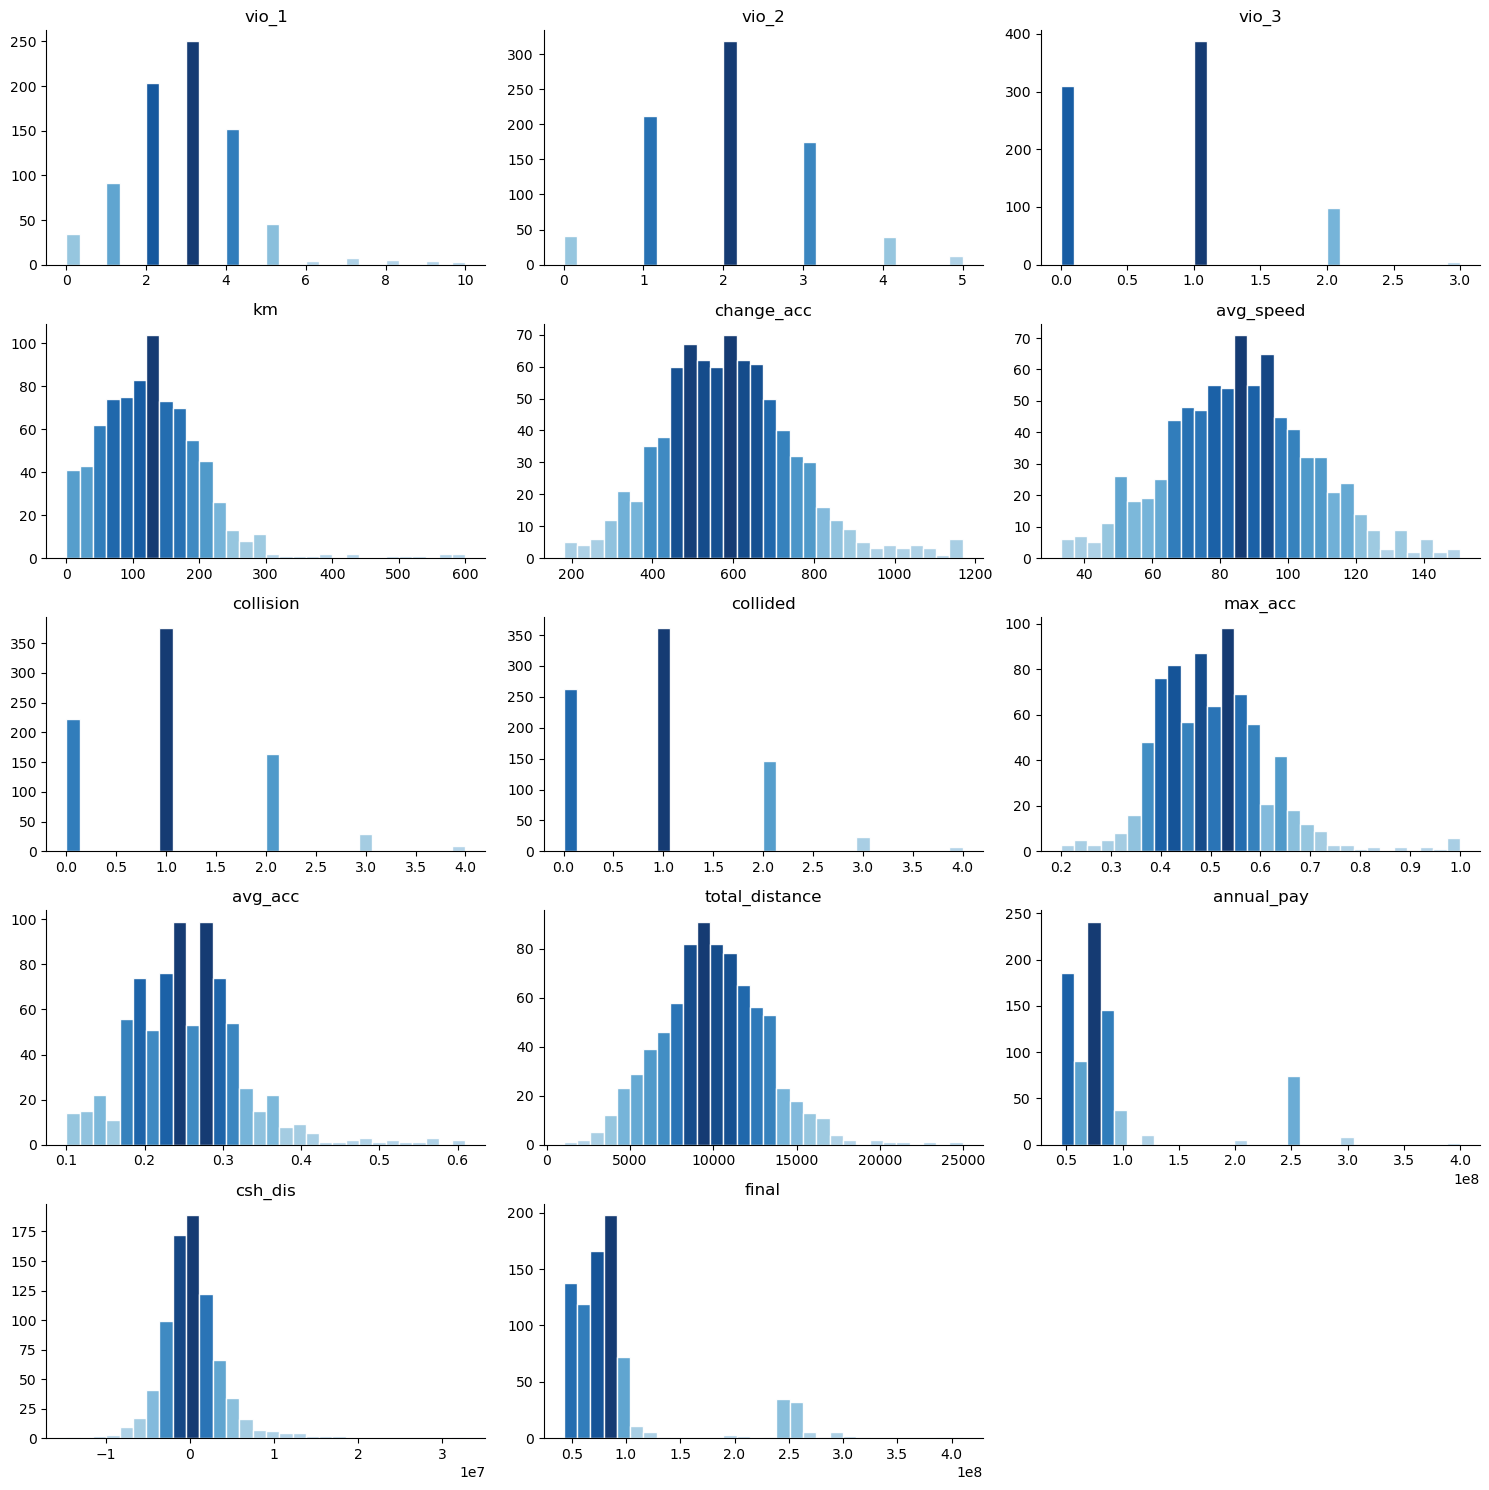

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap, Normalize

custom_colors = [
                 '#afd1e7', '#aacfe5', '#a4cce3', '#9fcae1', '#99c7e0', '#91c3de', '#8abfdd', '#84bcdb', '#7cb7da', '#75b4d8', '#6fb0d7',
                 '#68acd5', '#63a8d3', '#5da5d1', '#57a0ce', '#529dcc', '#4d99ca', '#4695c8', '#4191c6', '#3d8dc4', '#3888c1', '#3484bf',
                 '#3080bd', '#2b7bba', '#2676b8', '#2272b6', '#1e6db2', '#1b69af', '#1865ac', '#1460a8', '#115ca5', '#0e58a2', '#0a539e',
                 '#084f99', '#084b93', '#08468b', '#084285', '#083d7f', '#083877', '#083471', '#08306b']

df2 = df.select('vio_1', 'vio_2', 'vio_3', 'km', 'change_acc', 'avg_speed', 'collision', 'collided', 'max_acc', 'avg_acc', 'total_distance', 'annual_pay', 'csh_dis', 'final').toPandas()

fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

custom_cmap = ListedColormap(custom_colors)

for ax, col in zip(axes, df2.columns):
    counts, bins, patches = ax.hist(df2[col], bins=30, edgecolor='white', alpha=0.95)

    norm = Normalize(vmin=min(counts), vmax=max(counts))


    for count, patch in zip(counts, patches):
        color = custom_cmap(norm(count))
        patch.set_facecolor(color)

    ax.set_facecolor('white')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(col, fontsize=12)

for i in range(len(df2.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



***Overall, the frequency distribution of the variables in the dataset is quite normal; however, most distributions are right-skewed. This indicates that most of the variable ranges fall within a smaller range, although certain variables still have quite a few outliers. Generally, most variables exhibit relatively low levels of dispersion.***

***The histograms of change_acc, avg_speed, and total_distance show a relatively normal distribution as most average values are nearly aligned with the centerline of the graph. For the variables final, km, and annual_pay as well as csh_dish, there are significantly more outliers, causing the distribution to be quite right-skewed. Most kilometers for fuel reaching the red line are concentrated around 150km, although outliers such as values over 400 and 500km also appear.***

***For the variable annual_pay, the highest distribution value is around 0.7, and the value 2.5 also appears with an unusually high frequency despite being an outlier. For the variables collision and collided, the number of collisions and impacts are primarily centered around 1, although there is still a close frequency. This is similar to vio_2 and vio_3, where values are mainly concentrated at 2 and 1, respectively, with the value 3 appearing very rarely.***

***The graph for the variable max_acc, maximum braking acceleration, shows the presence of two peaks, with the highest values concentrated around 0.45g and 0.55g, values approaching a dangerous level.***

***The distribution values among the variables have been fully reflected in the final prediction results carried out in the latter half of the project***

####**Boxplots**

In [ ]:
numeric_cols = [col for col, dtype in df.dtypes if dtype in ['int', 'double']]
numeric_df = df.select(numeric_cols)


In [ ]:
numeric_pd = numeric_df.toPandas()


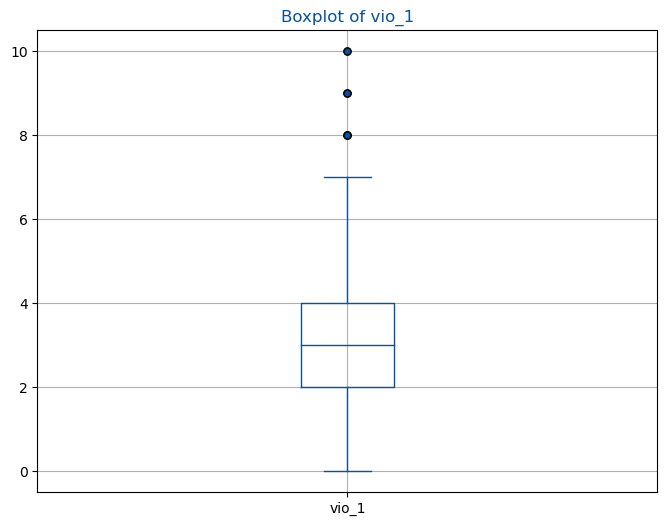

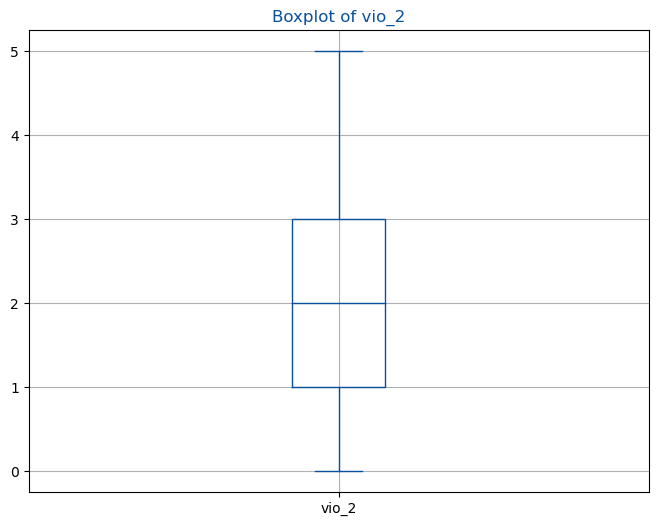

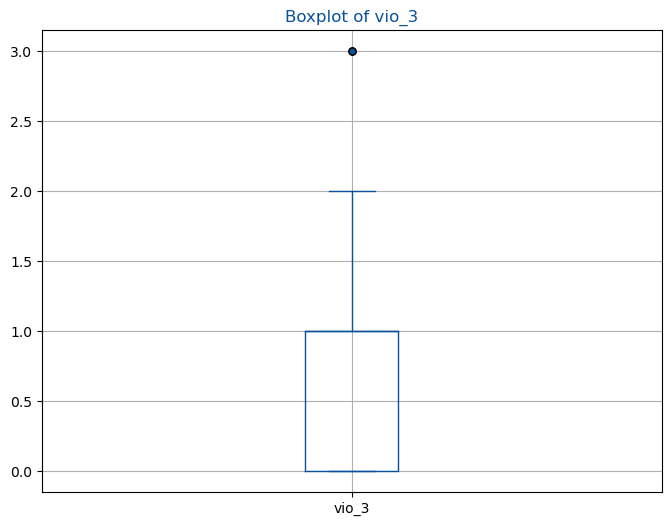

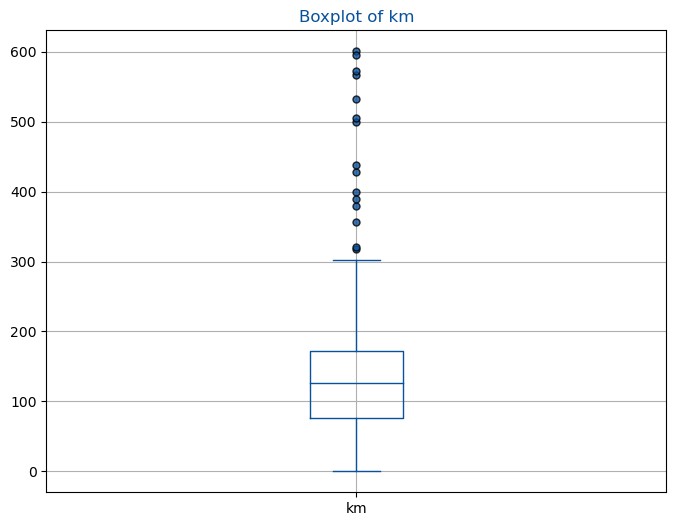

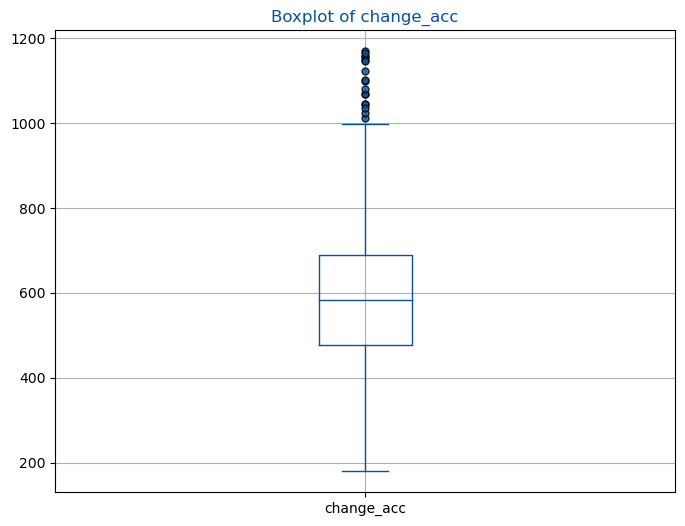

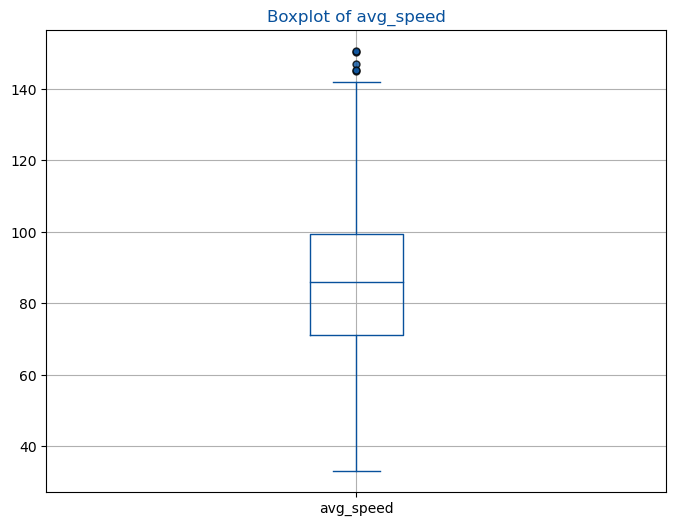

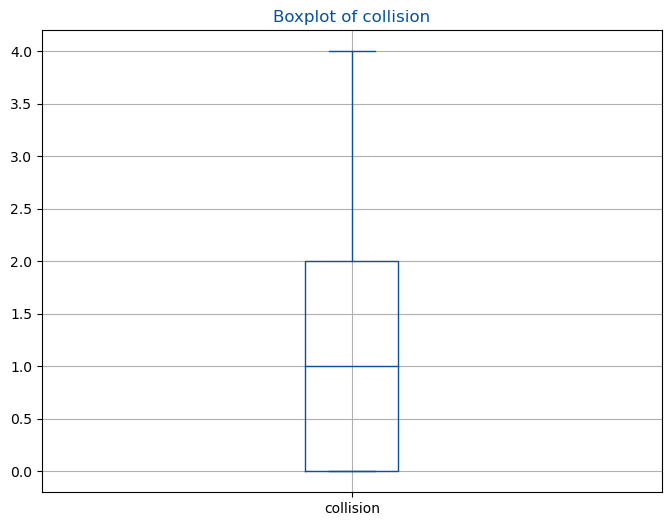

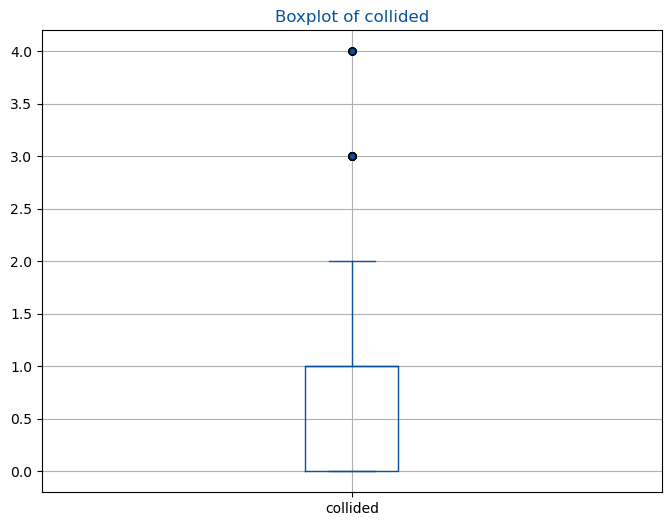

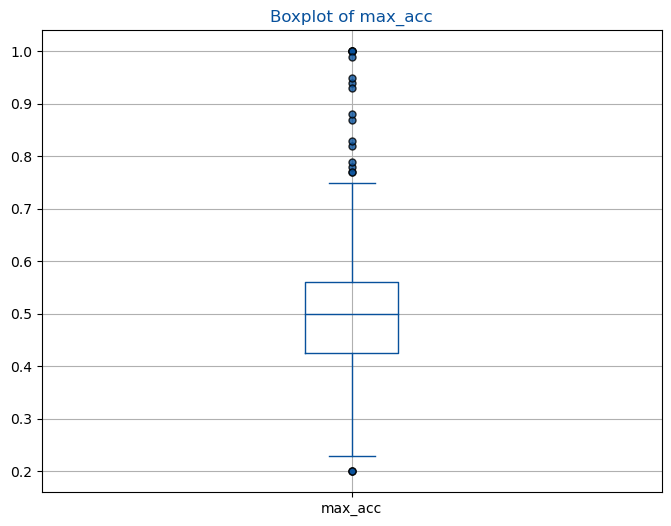

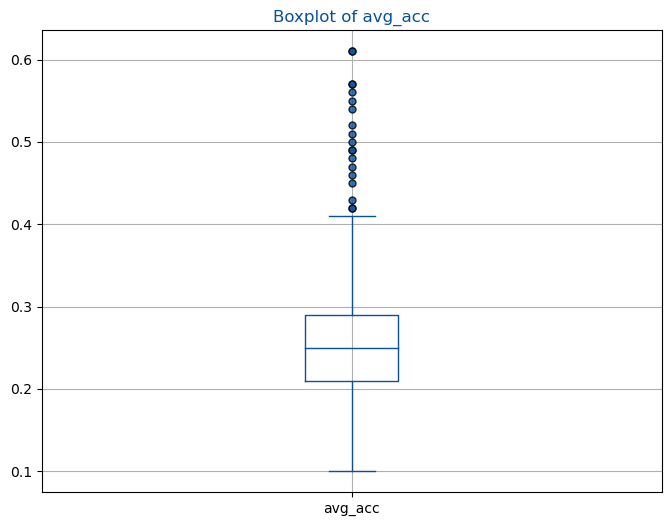

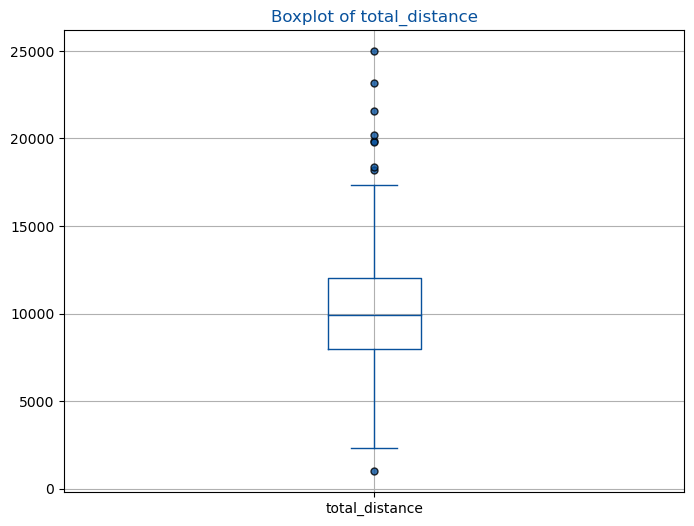

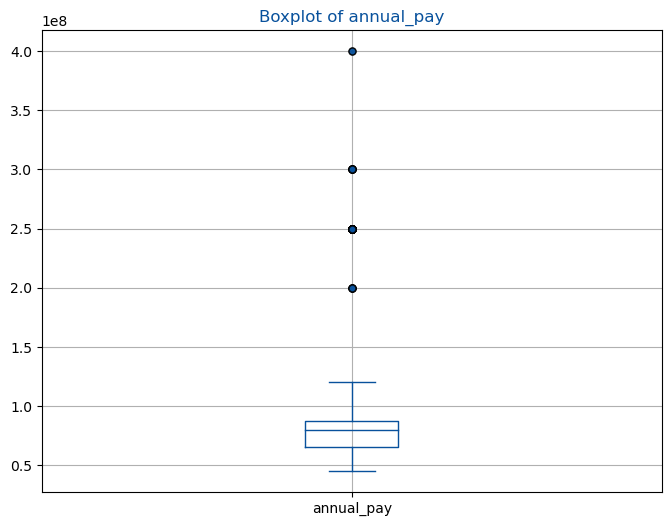

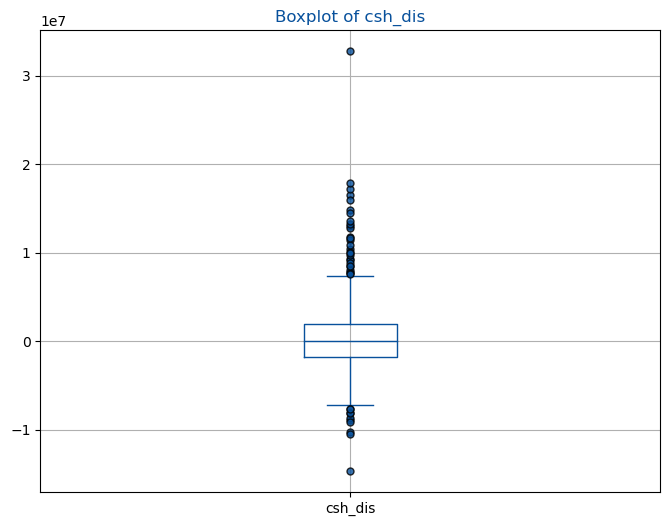

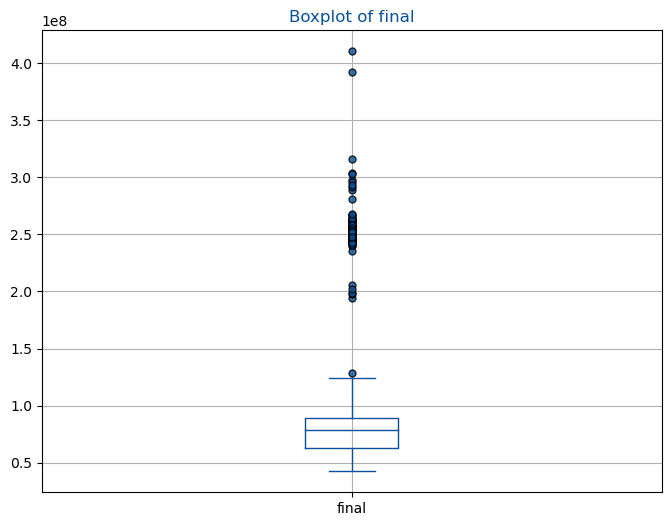

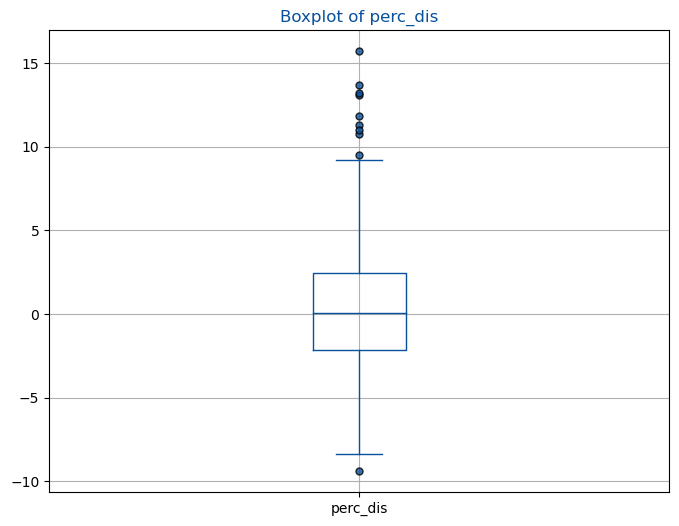

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    df.select(col).toPandas().boxplot(
        boxprops=dict(color='#08519C'),
        whiskerprops=dict(color='#08519C'),
        capprops=dict(color='#08519C'),
        medianprops=dict(color='#08519C'),
        flierprops=dict(markerfacecolor='#08519C', marker='o', markersize=5, alpha= 0.8)
    )
    plt.title(f'Boxplot of {col}',color="#08519C")
    plt.show()

1. Boxplot for vio_1:
Comments: Higher values for vio_1 indicate more frequent minor traffic violations. Outliers suggest customers with unusually high numbers of violations, which could lead to higher insurance premiums due to increased risk. Similar for vio_2

3. Boxplot for vio_3:
Comments: Represents the most severe traffic violations. Outliers indicate customers with significantly higher risk, which will likely result in higher premiums.

4. Boxplot for km,change_acc:
Comments: High outliers suggest some customers drive extensively on low fuel, indicating risky behavior. This can factor into higher premiums due to increased likelihood of accidents.

5. Boxplot for change_acc:
Comments: Sudden acceleration changes are often associated with aggressive driving. High outliers indicate risky driving behavior, leading to higher premiums.

6. Boxplot for avg_speed:
Comments: High average speeds can indicate risky driving behavior. Outliers suggest some customers regularly drive at high speeds, which may lead to higher premiums.


7. Boxplot for collision:
Comments: The number of collisions is a direct indicator of risk. Higher values, even without outliers, suggest more claims and higher premiums.

8. Boxplot for collided:
Comments:Similar to collision

9. Boxplot for max_acc:
Comments: Similar to 6 and Outliers indicate higher risk customers, impacting premiums.

11. Boxplot for total_distance:
Comments:Higher total distance driven can increase exposure to risk. Outliers indicate customers who drive significantly more, potentially leading to higher premiums due to increased risk of incidents.

12. Boxplot for annual_pay:
Comments: High annual payments might reflect high coverage amounts or high-risk customers. Significant outliers suggest very high-risk customers or those with expensive coverage.

13. Boxplot for csh_dis (Cash discount):
Comments: Discounts provided might reflect lower risk or customer loyalty. Outliers on the high end suggest significant discounts for certain customers, possibly due to good driving behavior or other factors.

14. Boxplot for final (Final insurance cost or valuation):
Comments: Represents the final cost of insurance. High outliers indicate customers with very high premiums, possibly due to high risk factors.



#### **Tree Map**

In [ ]:
# Import the necessary libraries
import pandas as pd
import plotly.express as px
from pyspark.sql import SparkSession

# Convert the Spark DataFrame to a Pandas DataFrame for annual pay column
pandas_df = df.toPandas()
annualpay_data = pandas_df["annual_pay"]  # Get the annual pay column (index 13)

# If the column contains categorical data, count the occurrences of each category
annualpay_counts = annualpay_data.value_counts().reset_index()
annualpay_counts.columns = ['Category', 'Count']

# Define a custom blue colorscale with the largest values being the darkest
custom_colorscale = [
    [0, '#EFF3FF'],    # Light Blue
    [0.25, '#BDD7E7'], # Lighter Blue
    [0.5, '#6BAED6'],  # Medium Blue
    [0.75, '#3182BD'], # Darker Blue
    [1.0, '#08519C']   # Darkest Blue
]

# Create the treemap using Plotly with the custom blue colorscale
fig = px.treemap(annualpay_counts, path=['Category'], values='Count',
                 title="Treemap of Annual pay from Train Data",
                 color='Count',
                 color_continuous_scale=custom_colorscale)

# Set layout background color to white
fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white'  # Ensures the plot area is white
)

# Set the treemap section background color to white and remove padding between tiles
fig.update_traces(
    textposition='middle center',
    textfont=dict(size=14),
    marker=dict(pad=dict(t=0, l=0, r=0, b=0))  # Removes padding between tiles
)

# Show the figure
fig.show()

**We can see that the most popular insurance plan is 80,000,000 VND, with 138 observations. and the other popular ones are also around that mark.**<br>
**Insurance packages with large value (>100 million) or too small (under 50 million) have very few customers interested in them.**

#### **Payment months analysis**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

df_payment_due = df.select("payment_due")
df_payment_due.show()



+-----------+
|payment_due|
+-----------+
|    14/3/25|
|    18/2/25|
|    19/5/25|
|    19/7/24|
|    24/2/25|
|   13/10/24|
|    2/11/24|
|   19/12/24|
|   28/12/24|
|     5/3/25|
|    18/9/24|
|    16/9/24|
|   11/11/24|
|    29/5/25|
|     3/2/25|
|    15/7/24|
|     1/1/25|
|   14/12/24|
|     5/1/25|
|    27/9/24|
+-----------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col, split, substring

df_month = df.selectExpr(
    "CAST(SUBSTRING_INDEX(SUBSTRING_INDEX(payment_due, '/', 2), '/', -1) AS INT) AS month"
)
df_month.show()




+-----+
|month|
+-----+
|    3|
|    2|
|    5|
|    7|
|    2|
|   10|
|   11|
|   12|
|   12|
|    3|
|    9|
|    9|
|   11|
|    5|
|    2|
|    7|
|    1|
|   12|
|    1|
|    9|
+-----+
only showing top 20 rows



CodeCache: size=131072Kb used=41346Kb max_used=41756Kb free=89725Kb
 bounds [0x000000010404c000, 0x000000010694c000, 0x000000010c04c000]
 total_blobs=15168 nmethods=14174 adapters=905
 compilation: disabled (not enough contiguous free space left)


Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=
/var/folders/4p/vdb58wh9529c_rzwhz0wxlkh0000gn/T/ipykernel_45615/1974880921.py:7: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



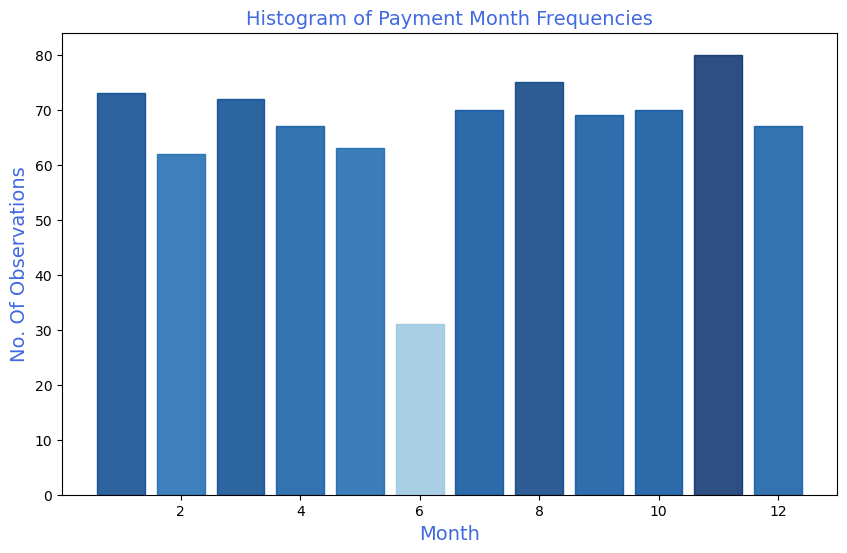

In [ ]:
from matplotlib.cm import get_cmap
month_counts = df_month.groupBy("month").count().orderBy("month")
month_counts_pd = month_counts.toPandas()

plt.figure(figsize=(10, 6))

cmap = get_cmap('Blues')
norm = Normalize(vmin=0, vmax=month_counts_pd["count"].max())

bars = plt.bar(month_counts_pd["month"], month_counts_pd["count"], edgecolor='white', alpha=0.85)

for bar, count in zip(bars, month_counts_pd["count"]):
    bar.set_color(cmap(norm(count)))

plt.xlabel('Month', fontsize=14, color="#4169E1")
plt.ylabel('No. Of Observations', fontsize=14, color="#4169E1")
plt.title('Histogram of Payment Month Frequencies', fontsize=14, color="#4169E1")

plt.show()

#### **Customer Age group analysis**

In [ ]:
import datetime
import pandas as pd

dfp = df.toPandas()
dfp['birth_date'] = pd.to_datetime(dfp['birth_date'])

time = dfp['birth_date']

/var/folders/4p/vdb58wh9529c_rzwhz0wxlkh0000gn/T/ipykernel_45615/1607633193.py:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
import pandas as pd
df_age = df.toPandas()['birth_date']
df_age
df_age = pd.DataFrame(df_age)
df_age
#df['birth_date'] = pd.to_datetime(df['birth_date'])

birth_date
0     14/11/87
1      14/4/85
2     11/11/81
3     10/11/81
4       6/7/81
..         ...
794   22/12/81
795    12/2/89
796    14/7/82
797    15/2/85
798   26/12/86

[799 rows x 1 columns]

--------

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
df_birth_date = df.select("birth_date")
df_birth_date.show()

+----------+
|birth_date|
+----------+
|  14/11/87|
|   14/4/85|
|  11/11/81|
|  10/11/81|
|    6/7/81|
|    7/4/84|
|    8/7/81|
|    7/1/81|
|   10/6/81|
|    2/3/85|
|   11/9/88|
|    5/1/89|
|    5/2/89|
|   11/9/80|
|   27/2/89|
|  12/10/83|
|   30/4/80|
|    7/4/86|
|    6/9/90|
|    6/4/81|
+----------+
only showing top 20 rows



In [ ]:
pandas_df = df.toPandas()
pandas_df['birth_date'] = pd.to_datetime(pandas_df['birth_date'], format='%d/%m/%y')
pandas_df['year'] = pandas_df['birth_date'].dt.strftime('%y')
pandas_df['year']

0      87
1      85
2      81
3      81
4      81
       ..
794    81
795    89
796    82
797    85
798    86
Name: year, Length: 799, dtype: object

In [ ]:
pandas_df['year'] = pandas_df['year'].apply(lambda x: '20' + x if 0 <= int(x) <= 10 else '19' + x)
pandas_df['year']

0      1987
1      1985
2      1981
3      1981
4      1981
       ... 
794    1981
795    1989
796    1982
797    1985
798    1986
Name: year, Length: 799, dtype: object

In [ ]:
from datetime import datetime

In [ ]:
print(pandas_df['year'].dtype)
print(pandas_df['year'].unique())
pandas_df['year'] = pandas_df['year'].astype(int)

object
['1987' '1985' '1981' '1984' '1988' '1989' '1980' '1983' '1986' '1990'
 '1991' '1997' '1992' '1995' '1994' '1982' '1993' '1996' '2000' '2002'
 '1999' '2001' '1998']


In [ ]:
current_year = datetime.now().year
# Tính tuổi từ cột "year"
pandas_df['age'] = current_year - pandas_df['year']
pandas_df['age']

0      37
1      39
2      43
3      43
4      43
       ..
794    43
795    35
796    42
797    39
798    38
Name: age, Length: 799, dtype: int64

In [ ]:
#Age distribution histogram

counts, bins = np.histogram(pandas_df['age'], bins=20)
norm = Normalize(vmin=min(counts), vmax=max(counts))

cmap = matplotlib.colormaps["Blues"]
fig, ax = plt.subplots()

for count, edge_left, edge_right in zip(counts, bins[:-1], bins[1:]):
    color = cmap(norm(count))
    ax.bar(edge_left, count, width=edge_right-edge_left, color=color, edgecolor='white', alpha=0.85)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


NameError: name 'matplotlib' is not defined

***Through the histogram chart above, it shows the age distribution interested in insurance packages. The older you get, the more you are intesrested in insurance policies. The peak age is at 40 years old.***
<br>
***One possible explanation of this is that Once you have knowledge and finances, people will have a clearer need for insurance. In addition, people under the age of 30 do not have too much demand as clearly shown in the chart. For ages 30 to 35, people's interest level increases. Ages from 35 to 40 years old have the most obvious needs.***

#### **Correlation** **analysis**

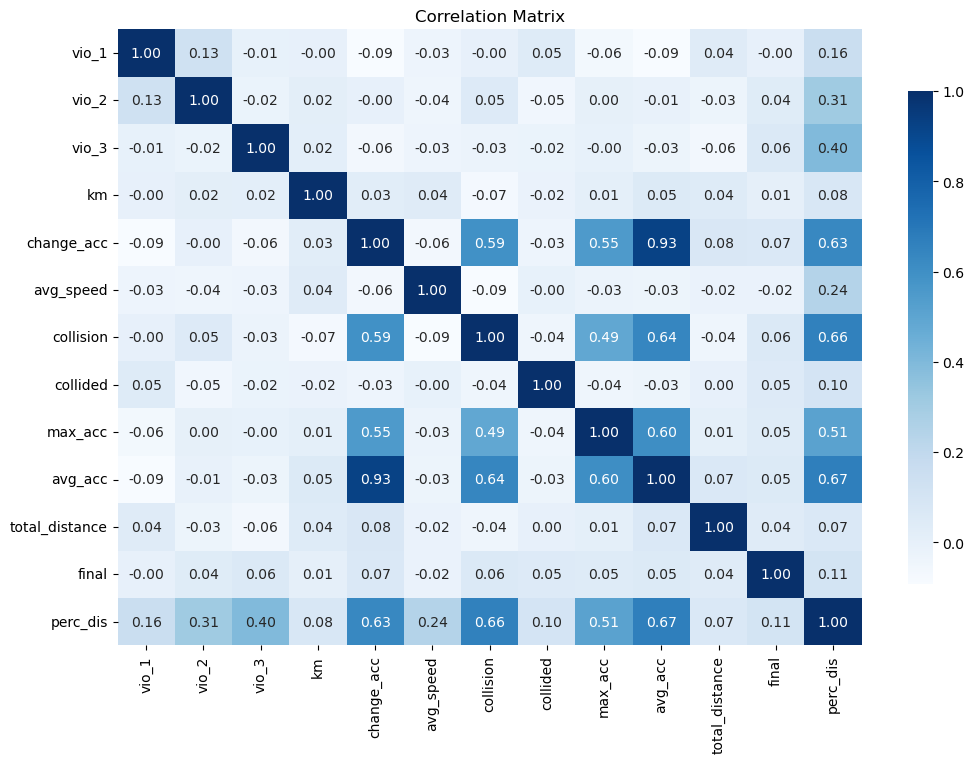

In [ ]:
#Correlation analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


corr = df.toPandas().drop(columns=['name', 'id', 'birth_date', 'payment_due', 'csh_dis', 'annual_pay', 'phash']).corr()


plt.figure(figsize=(12, 8), facecolor='none')


sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar_kws={'shrink': .8})
plt.title('Correlation Matrix')


ax = plt.gca()
ax.set_facecolor('none')

plt.show()

***Through the correlation matrix, we can infer that the features with the highest correlation to the target variable (>0.5) are:***
- The numbers of sudden acceleration chabges
- The numbers of collisions caused by the driver
- The maximum acceleration
- The average acceleration
<br>
***The following features has some correlation: ([0.15,0.50))**
- Traffic violation at level I, II, III
- Average Speed <br>
***and the rest has next to none correlation to the target variable**

In [ ]:
import matplotlib.pyplot as plt

### **Testing Different Models using PySpark's MLlib**

In [ ]:
from pyspark import SparkFiles
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator


In [ ]:
#Selecting the features data for the train dataset
assembler = VectorAssembler(
    inputCols=["vio_1","vio_2","vio_3","km","change_acc","avg_speed","collision","collided","max_acc","avg_acc","total_distance"],
    outputCol="feat")

df = assembler.transform(df)

In [ ]:
df.show()

+---------------+---------+-----+-----+-----+------+----------+---------+---------+--------+-------+-------+--------------+----------+------------+---------+-----------+----------+--------------------+-------------------+--------------------+
|           name|       id|vio_1|vio_2|vio_3|    km|change_acc|avg_speed|collision|collided|max_acc|avg_acc|total_distance|annual_pay|     csh_dis|    final|payment_due|birth_date|               phash|           perc_dis|                feat|
+---------------+---------+-----+-----+-----+------+----------+---------+---------+--------+-------+-------+--------------+----------+------------+---------+-----------+----------+--------------------+-------------------+--------------------+
| Tran Thi Nhung|BFT239940|  5.0|  2.0|  1.0|  35.0|     422.0|    76.44|      0.0|     1.0|    0.4|   0.18|       10161.0| 250000000|  -6468250.0|243531750|    14/3/25|  14/11/87|61b5374d31a5008b5...|            -2.5873|[5.0,2.0,1.0,35.0...|
|     Vu Thi Lan|BFT857180| 

In [ ]:
train_data = df.select("feat", "perc_dis")
train_data.show()

+--------------------+-------------------+
|                feat|           perc_dis|
+--------------------+-------------------+
|[5.0,2.0,1.0,35.0...|            -2.5873|
|[1.0,2.0,0.0,100....|     -4.10187848875|
|[4.0,3.0,0.0,85.1...|         4.22424375|
|[1.0,0.0,0.0,94.0...|  2.183945855357143|
|[6.0,1.0,1.0,34.1...|-4.0447294793103445|
|[3.0,3.0,0.0,111....|-2.0179760869565215|
|[3.0,2.0,0.0,211....|-2.8972624000000002|
|[3.0,4.0,1.0,218....|-0.8485299999999999|
|[3.0,5.0,1.0,147....| 2.6124401896551723|
|[3.0,2.0,0.0,143....|-3.5670254399999997|
|[2.0,1.0,0.0,116....|       -4.280137064|
|[3.0,2.0,1.0,138....|-0.3530322867857143|
|[3.0,2.0,0.0,130....| -4.398105747126436|
|[1.0,1.0,0.0,130....| 0.7622000153846153|
|[2.0,2.0,0.0,98.0...|            -0.0762|
|[4.0,2.0,0.0,115....|-1.3974803173333334|
|[2.0,1.0,1.0,159....|      -3.5699504975|
|[3.0,3.0,1.0,55.1...| 1.1853848874666666|
|[2.0,2.0,0.0,51.4...|-1.6396402298850574|
|[4.0,2.0,1.0,94.6...| 3.9000313920000003|
+----------

In [ ]:
#Split data
train_df, val_df = train_data.randomSplit([0.7, 0.3], seed=42)

In [ ]:
#Build and train model
lr = LinearRegression(featuresCol="feat", labelCol="perc_dis", predictionCol="predicted_perc")
lr_model = lr.fit(train_df)

24/05/21 20:30:25 WARN Instrumentation: [d321de32] regParam is zero, which might cause numerical instability and overfitting.
24/05/21 20:30:25 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/05/21 20:30:25 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [ ]:
#make predictions
predictions = lr_model.transform(val_df)

In [ ]:
#Evaluationg model:
evaluator = RegressionEvaluator(labelCol="perc_dis", predictionCol="predicted_perc", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(rmse))

Root Mean Squared Error (RMSE) on test data: 0.370


In [ ]:
coefficients = lr_model.coefficients
intercept = lr_model.intercept

print("Coefficients: ", coefficients)
print("Intercept: {:.3f}".format(intercept))

Coefficients:  [0.4061760321549247,1.074415007926181,2.383860514333211,0.0027069561416406145,0.005388361296316448,0.05736536158862728,1.691824485390237,0.6781815264481776,3.76330244459315,7.232354902322852,9.531901489820185e-05]
Intercept: -20.397


In [ ]:
feature_importance = sorted(list(zip(df.columns[:-1], map(abs, coefficients))), key=lambda x: x[1], reverse=True)

print("Feature Importance:")
for feature, importance in feature_importance:
    print("  {}: {:.3f}".format(feature, importance))

Feature Importance:
  collided: 7.232
  collision: 3.763
  vio_1: 2.384
  change_acc: 1.692
  id: 1.074
  avg_speed: 0.678
  name: 0.406
  km: 0.057
  vio_3: 0.005
  vio_2: 0.003
  max_acc: 0.000


In [ ]:
#Testing gradient boosting regressor
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol="feat", labelCol="perc_dis", predictionCol="predicted_perc", maxDepth = 4, maxBins = 1000, minInstancesPerNode = 5,stepSize=0.2,seed=42)

In [ ]:
#train model
gbt_model = gbt.fit(train_df)

24/05/21 20:30:43 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 1000 to 554 (= number of training instances)


In [ ]:
#make predictions
predictions_gbt = gbt_model.transform(val_df)

In [ ]:
#Evaluationg model:
evaluator = RegressionEvaluator(labelCol="perc_dis", predictionCol="predicted_perc", metricName="rmse")
rmse = evaluator.evaluate(predictions_gbt)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(rmse))

NameError: name 'predictions_gbt' is not defined

In [ ]:
predictions

DataFrame[feat: vector, perc_dis: double, predicted_perc: double]

In [ ]:
#Hyperparameter tuning for the Gradient Boosting model
# from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
# gbt_1 = GBTRegressor(featuresCol='feat', labelCol='perc_dis', seed=42)

# param_grid = ParamGridBuilder() \
#     .addGrid(gbt.maxDepth, [1]) \
#     .addGrid(gbt.maxIter, [1000, 2500]) \
#     .addGrid(gbt.stepSize, [0.12, 0.05]) \
#     .build()
# # Evaluate the model
# evaluator = RegressionEvaluator(labelCol='perc_dis', metricName='rmse')
# # Define the cross-validator
# crossval = CrossValidator(estimator=gbt_1,
#                           estimatorParamMaps=param_grid,
#                           evaluator=evaluator,
#                           numFolds=5, seed=42)
# # Train the model using cross-validation
# cv_model = crossval.fit(train_df)

# # Make predictions on the testing data
# cv_predictions = cv_model.transform(val_df)

# cv_rmse = evaluator.evaluate(cv_predictions)
# print("CV RMSE: {:.2f}".format(cv_rmse))

In [ ]:
#cv_model.getEstimatorParamMaps()[ np.argmax(cv_model.avgMetrics) ]

In [ ]:
#lr_model.save(f"gs://{bucket_name}/LR/")

Using the random forest regressor

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
rfr = RandomForestRegressor(featuresCol="feat", labelCol="perc_dis", predictionCol="predicted_perc")
evaluator = RegressionEvaluator(labelCol='perc_dis',predictionCol='predicted_perc', metricName='rmse')
rfr_model = rfr.fit(train_df)
predictions2 = rfr_model.transform(val_df)
print(predictions2)
rmse = evaluator.evaluate(predictions2)
print("Root Mean Squared Error (RMSE) on test data: {:.3f}".format(rmse))
rfr_model.featureImportances

DataFrame[feat: vector, perc_dis: double, predicted_perc: double]
Root Mean Squared Error (RMSE) on test data: 1.789


SparseVector(11, {0: 0.0258, 1: 0.0575, 2: 0.118, 3: 0.0169, 4: 0.1216, 5: 0.0731, 6: 0.2757, 7: 0.0095, 8: 0.1207, 9: 0.1671, 10: 0.014})

### **Visualizing Predictions**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

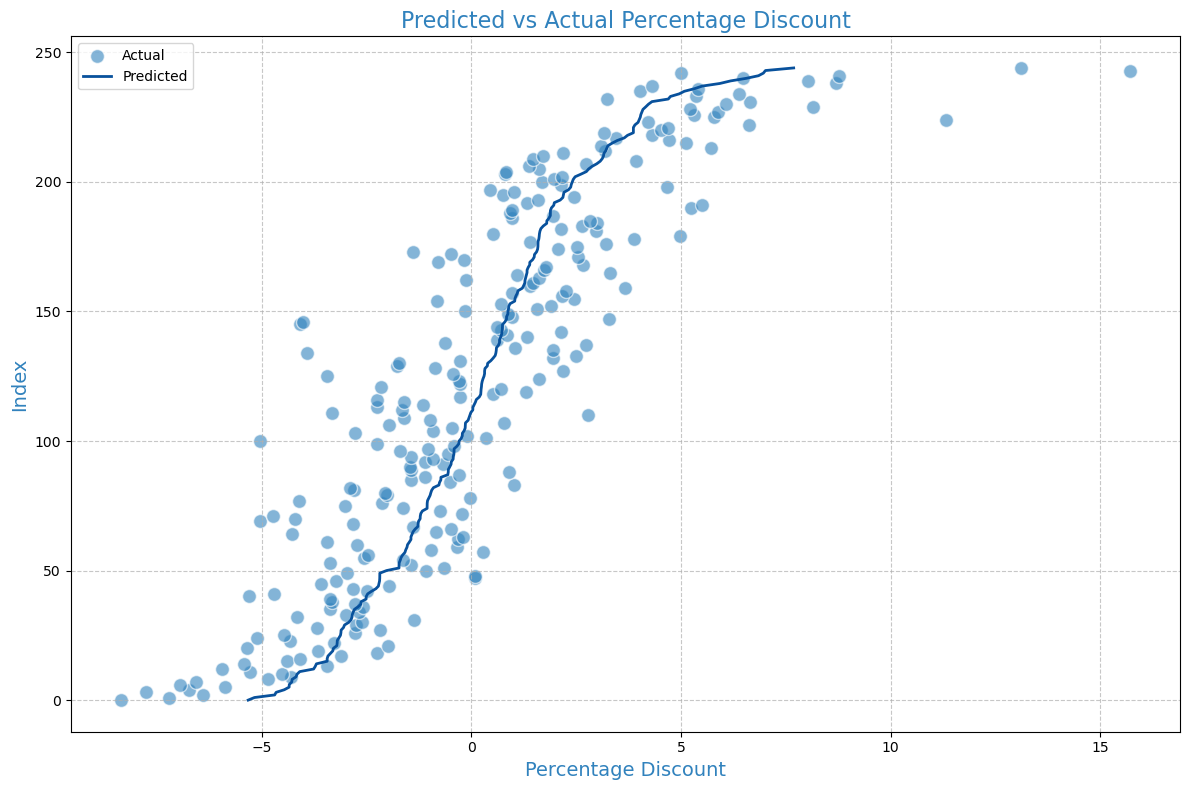

In [ ]:
# Visualizing Random Forest Predictions
predictions_pd = predictions2.select("predicted_perc", "perc_dis").toPandas()

# Sort predicted values and corresponding actual values
predictions_pd_sorted = predictions_pd.sort_values(by='predicted_perc')

plt.figure(figsize=(12, 8))

# Plot actual values as dots
plt.scatter(predictions_pd_sorted["perc_dis"], np.arange(len(predictions_pd_sorted)), alpha=0.6, edgecolors='w', s=100, c='#3182BD', label="Actual")

# Plot predicted values as a line
plt.plot(predictions_pd_sorted["predicted_perc"], np.arange(len(predictions_pd_sorted)), color='#08519C', linewidth=2, label="Predicted")

plt.xlabel("Percentage Discount", fontsize=14, color="#3182BD")
plt.ylabel("Index", fontsize=14, color="#3182BD")  # Label y-axis as "Index"
plt.title("Predicted vs Actual Percentage Discount", fontsize=16, color="#3182BD")
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [ ]:
# Visualizing Gradient Boosting Tree Regressor

predictions_pd = predictions_gbt.select("predicted_perc", "perc_dis").toPandas()

# Sort predicted values and corresponding actual values
predictions_pd_sorted = predictions_pd.sort_values(by='predicted_perc')

plt.figure(figsize=(12, 8))

# Plot actual values as dots
plt.scatter(predictions_pd_sorted["perc_dis"], np.arange(len(predictions_pd_sorted)), alpha=0.6, edgecolors='w', s=100, c='#3182BD', label="Actual")

# Plot predicted values as a line
plt.plot(predictions_pd_sorted["predicted_perc"], np.arange(len(predictions_pd_sorted)), color='#08519C', linewidth=2, label="Predicted")

plt.xlabel("Percentage Discount", fontsize=14, color="#3182BD")
plt.ylabel("Index", fontsize=14, color="#3182BD")  # Label y-axis as "Index"
plt.title("Predicted vs Actual Percentage Discount", fontsize=16, color="#3182BD")
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

NameError: name 'predictions_gbt' is not defined

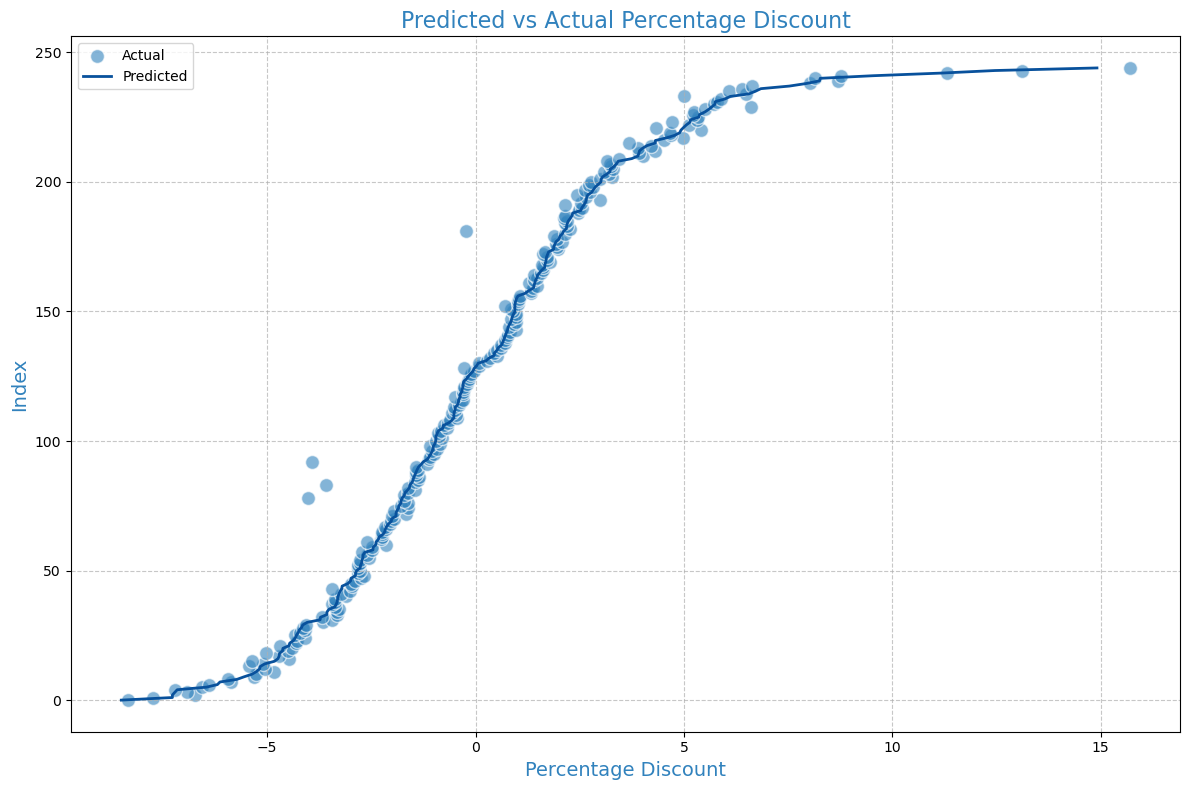

In [ ]:
# Visualizing Linear Model Results

predictions_pd = predictions.select("predicted_perc", "perc_dis").toPandas()

# Sort predicted values and corresponding actual values
predictions_pd_sorted = predictions_pd.sort_values(by='predicted_perc')

plt.figure(figsize=(12, 8))

# Plot actual values as dots
plt.scatter(predictions_pd_sorted["perc_dis"], np.arange(len(predictions_pd_sorted)), alpha=0.6, edgecolors='w', s=100, c='#3182BD', label="Actual")

# Plot predicted values as a line
plt.plot(predictions_pd_sorted["predicted_perc"], np.arange(len(predictions_pd_sorted)), color='#08519C', linewidth=2, label="Predicted")

plt.xlabel("Percentage Discount", fontsize=14, color="#3182BD")
plt.ylabel("Index", fontsize=14, color="#3182BD")  # Label y-axis as "Index"
plt.title("Predicted vs Actual Percentage Discount", fontsize=16, color="#3182BD")
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

**After testing different models, with the finding results, We concluded that it is best to use a Linear Regression Model, becasue it has the Lowest RMSE (Root Mean Squared Error), as well as the it passes the VIF test, and The Linear Model is also suitable for predicting continous values**

#### **VIF Test**


In [ ]:
#Step 1
import pandas as pd
from pyspark.sql import SparkSession

# Convert to Pandas DataFrame for VIF calculation
pandas_df = df.select("vio_1", "vio_2", "vio_3", "km", "change_acc", "avg_speed", "collision", "collided", "max_acc", "avg_acc", "total_distance").toPandas()

#Step 2
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add constant column for intercept
X = sm.add_constant(pandas_df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


          Variable        VIF
0            const  67.817318
1            vio_1   1.038999
2            vio_2   1.029062
3            vio_3   1.014758
4               km   1.028093
5       change_acc   7.114326
6        avg_speed   1.023311
7        collision   1.819231
8         collided   1.009465
9          max_acc   1.623294
10         avg_acc   8.309115
11  total_distance   1.027129


**To test the multicollinearity phenomenon of the model, the team used the VIF test.**
VIF test results show:
- Most variables have relatively low VIF coefficients, at < 2.
- Only change_acc and avg_acc have VIF coefficients of 7.46 and 8.72, respectively, showing that the model has signs of multicollinearity.

**However, at the standard VIF level of < 10, the model is still accepted.**

### **Training on full trainig data and predicting on unseen data**

In [ ]:
#Step 1: Reimporting the training dataset and the Test dataset
file_name_train = "Insurance_train.csv"
file_name_test = "Insurance_test.csv"

file_path1 = f"{file_name_train}"
file_path2 = f"{file_name_test}"

df_final_train = spark.read.csv(file_path1, header=True, inferSchema=True)
df_final_test = spark.read.csv(file_path2, header=True, inferSchema=True)

df_final_train = df_final_train.dropna()

df_final_train = df_final_train.withColumn("perc_dis",(df_final_train["csh_dis"]/df_final_train["annual_pay"])*100)

In [ ]:
#Step 2: Vector combining
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

assembler = VectorAssembler(
    inputCols=["vio_1","vio_2","vio_3","km","change_acc","avg_speed","collision","collided","max_acc","avg_acc","total_distance"],
    outputCol="feat")

df_final_train = assembler.transform(df_final_train)
df_final_test = assembler.transform(df_final_test)

print(df_final_train.show())
print(df_final_test.show())

+---------------+---------+-----+-----+-----+------+----------+---------+---------+--------+-------+-------+--------------+----------+------------+---------+-----------+----------+--------------------+-------------------+--------------------+
|           name|       id|vio_1|vio_2|vio_3|    km|change_acc|avg_speed|collision|collided|max_acc|avg_acc|total_distance|annual_pay|     csh_dis|    final|payment_due|birth_date|               phash|           perc_dis|                feat|
+---------------+---------+-----+-----+-----+------+----------+---------+---------+--------+-------+-------+--------------+----------+------------+---------+-----------+----------+--------------------+-------------------+--------------------+
| Tran Thi Nhung|BFT239940|  5.0|  2.0|  1.0|  35.0|     422.0|    76.44|      0.0|     1.0|    0.4|   0.18|       10161.0| 250000000|  -6468250.0|243531750|    14/3/25|  14/11/87|61b5374d31a5008b5...|            -2.5873|[5.0,2.0,1.0,35.0...|
|     Vu Thi Lan|BFT857180| 

In [ ]:
#Part 3: Creating model and train model
reg = LinearRegression(featuresCol="feat", labelCol="perc_dis", predictionCol="predicted_perc")
final_model = reg.fit(df_final_train)
#final_model.save(f"gs://{bucket_name}/FinalModel/")

24/05/21 20:31:46 WARN Instrumentation: [fce5b102] regParam is zero, which might cause numerical instability and overfitting.


In [ ]:
#Part 4: Predict on Test data with saved model, and save processed data
# Load the saved model
#modelf = LinearRegression.load(f"gs://{bucket_name}/FinalModel/")

# Use the model to make predictions on the test data
predictions = final_model.transform(df_final_test)

# Join the predictions with the original test DataFrame
result_df = df_final_test.join(predictions.select("id", "predicted_perc"), on="id")

# Calculate the discount value and final value
result_df = result_df.withColumn("csh_dis", (result_df["predicted_perc"]/100) * result_df["annual_pay"])
result_df = result_df.withColumn("final", result_df["annual_pay"] - result_df["csh_dis"])
result_df = result_df.drop("feat")
# Save the processed DataFrame
result_df.write.csv("Processed_insurance_data.csv", header=True, mode="overwrite")
result_df.show()

+---------+---------------+-----+-----+-----+------------------+----------+-----------------+---------+--------+------------------+-------------------+--------------+----------+-----------+----------+--------------------+-------------------+-------------------+--------------------+
|       id|           name|vio_1|vio_2|vio_3|                km|change_acc|        avg_speed|collision|collided|           max_acc|            avg_acc|total_distance|annual_pay|payment_due|birth_date|               phash|     predicted_perc|            csh_dis|               final|
+---------+---------------+-----+-----+-----+------------------+----------+-----------------+---------+--------+------------------+-------------------+--------------+----------+-----------+----------+--------------------+-------------------+-------------------+--------------------+
|BFT142185|     Bui Thi An|  3.0|  3.0|  1.0|            234.84|     546.0|            86.65|      1.0|     0.0|              0.43|               0.24|

#**Part 2: Data Extraction program: User Interface**
<br>
This part is the customer's interface, where they will enter their ID, and it will return with their payment ammound, and their due date
<br>
Nhóm mình có chuẩn bị một danh sách ID và mật khẩu để mọi người có thể vào thử truy cập dữ liệu của từng khách hàng

In [ ]:
#Starting spark cluster
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import split

spark = SparkSession.builder.appName('pyspark').getOrCreate()


In [ ]:
#Importing the dataframe
file_name = "Processed_insurance_data.csv"
file_path3 = f"{file_name}"

df = spark.read.csv(file_path3, header=True, inferSchema=True)

In [ ]:
#Password Entering protocol
import hashlib
def hash_password(password):
    return hashlib.md5(password.encode()).hexdigest()

ids = input('Enter your ID:')
user_row = df.filter(df.id == ids).select("phash", "final","payment_due","csh_dis","name","annual_pay","id","birth_date").collect()

if user_row:
    stored_phash = user_row[0]['phash']
    attempts = 0
    while attempts < 5:
        password = input('Enter your password: ')
        hashed_password = hash_password(password)
        if hashed_password == stored_phash:
            print(f"Full name: {user_row[0]['name']}")
            print(f"D.O.B: {user_row[0]['birth_date']}")
            print(f"ID: {user_row[0]['id']}")
            print(f"You will have to pay: {round(user_row[0]['final']):,} VND")
            print(f"Original payment: {round(user_row[0]['annual_pay']):,} VND")
            if user_row[0]['csh_dis'] > 0:
              print(f"You got a discount of: \033[92m{round(user_row[0]['csh_dis']):,} VND\033[00m. Congratulations!")
            elif user_row[0]['csh_dis'] < 0:
              print(f"Your penalty is: \033[91m{- round(user_row[0]['csh_dis']):,} VND\033[00m. Please drive safely!")
            else:
              print("You have no discounts or penalties")
            print(f"Pay the ammount by the date: {user_row[0]['payment_due']}")

            break
        else:
            attempts += 1
            print(f"Incorrect password. Attempts left: {5 - attempts}")
    if attempts == 5:
        print("Maximum attempts reached. Access denied.")
else:
    print("No value found for the given ID")


Enter your ID:BFT783931
Enter your password: upflash2
Full name: Ngo Van Phat
D.O.B: 14/8/86
ID: BFT783931
You will have to pay: 247,156,853 VND
Original payment: 250,000,000 VND
You got a discount of: 2,843,147 VND. Congratulations!
Pay the ammount by the date: 8/7/24


In [ ]:
#chỉ chạy khi kết thúc code và tắt web
spark.stop()